In [2]:
import pandas as pd
import matplotlib.pyplot as plt

leisure_2019 = pd.read_csv('leisure.txt', sep="\t", encoding = 'utf8', index_col = 1)
leisure_2019.drop('기간', axis='columns', inplace=True)
leisure_2019.replace('(.*):(.*)', r'\1.\2', regex=True, inplace=True)  # Dataframe 전체에 있던 : 를 .로 변경하기 위한 정규표현식. 그래야 숫자로 취급가능할 것 같아서. 

preference_2019 = pd.read_csv('leisure preference 2019.txt', sep='\t', encoding='utf8', index_col=1)
preference_2019.drop('기간', axis='columns', inplace=True)

leisure_2019

,행동분류별,요일평균,요일평균.1,요일평균.2,평일,평일.1,평일.2,토요일,토요일.1,토요일.2,일요일,일요일.1,일요일.2
구분,,,,,,,,,,,,,
구분,행동분류별,전체,남자,여자,전체,남자,여자,전체,남자,여자,전체,남자,여자
여가생활시간,여가생활시간,4.41,4.48,4.36,4.13,4.12,4.13,5.44,6.09,5.23,6.09,6.33,5.45
자원봉사 및 무급연수,소계,0.01,0.01,0.02,0.01,0.01,0.01,0.02,0.02,0.03,0.02,0.01,0.03
자원봉사 및 무급연수,비조직 기반(직접) 자원봉사,0.01,0.01,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01
자원봉사 및 무급연수,조직 및 공동체 기반의 자원봉사,0.01,0.01,0.01,0.01,0.00,0.01,0.01,0.01,0.01,0.01,0.00,0.02
교제 및 참여활동,소계,0.53,0.42,1.03,0.49,0.39,0.58,0.55,0.42,1.06,1.13,0.56,1.28
교제 및 참여활동,교제활동,0.36,0.31,0.42,0.35,0.30,0.40,0.40,0.34,0.46,0.38,0.32,0.45
교제 및 참여활동,참여활동,0.04,0.04,0.04,0.04,0.05,0.04,0.04,0.03,0.04,0.03,0.03,0.03
교제 및 참여활동,종교활동,0.12,0.06,0.17,0.09,0.04,0.14,0.10,0.04,0.15,0.31,0.21,0.40


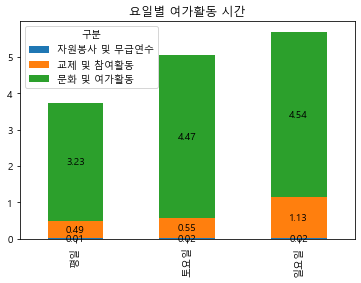

In [9]:

# 요일별 여가활동 시간 비교
leisure_2019_day = leisure_2019.loc[leisure_2019['행동분류별']=='소계', ['요일평균', '평일', '토요일', '일요일']]
leisure_2019_day = leisure_2019_day.astype('float')
leisure_2019_day = leisure_2019_day.transpose()

plt.rcParams['font.family']='Malgun Gothic'
graph = leisure_2019_day['평일':].plot(kind='bar', title='요일별 여가활동 시간', stacked=True)
for p in graph.patches:  
    left, bottom, width, height = p.get_bbox().bounds
    graph.annotate("%.2f"%(height), xy=(left+width/2, bottom+height/2), ha='center', va='center')

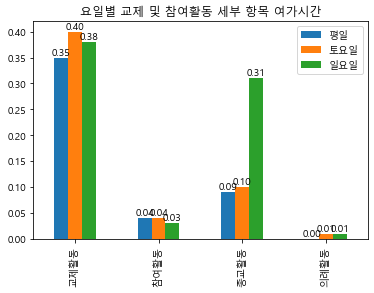

In [11]:
leisure_2019_day = leisure_2019.loc['교제 및 참여활동', ['평일', '토요일', '일요일']]
leisure_2019_day = leisure_2019_day.astype('float')
leisure_2019_day.index=['소계', '교제활동', '참여활동', '종교활동', '의례활동']

plt.rcParams['font.family']='Malgun Gothic'
graph = leisure_2019_day.loc['교제활동':, :].plot(kind='bar', title='요일별 교제 및 참여활동 세부 항목 여가시간')
for p in graph.patches:  
    left, bottom, width, height = p.get_bbox().bounds
    graph.annotate("%.2f"%(height), xy=(left+width/2, height+0.01), ha='center', va='center')

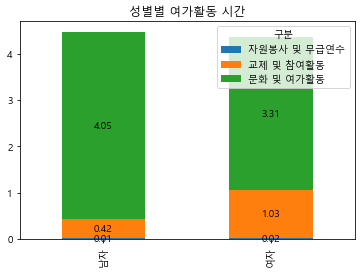

In [4]:
# 성별에 따른 여가활동 시간
leisure_2019_gender = leisure_2019.loc[leisure_2019['행동분류별']=='소계', ['요일평균', '요일평균.1', '요일평균.2']]
leisure_2019_gender = leisure_2019_gender.astype('float')
leisure_2019_gender = leisure_2019_gender.transpose()
leisure_2019_gender.index=['평균', '남자', '여자']

plt.rcParams['font.family']='Malgun Gothic'
graph = leisure_2019_gender['남자':].plot(kind='bar', title='성별별 여가활동 시간', stacked=True)
for p in graph.patches:  
    left, bottom, width, height = p.get_bbox().bounds
    graph.annotate("%.2f"%(height), xy=(left+width/2, bottom+height/2), ha='center', va='center')

## 왜 여성에게서 '교제 및 참여활동'시간이 더 높을까?
'교제'의 경우 여성과 남성에게서 비슷하게 나타날 것이라고 생각했는데 꽤 차이가 있어서 세부사항 볼 필요성 느낌.  

분석 결과)
* '교제 및 참여활동'은 세부 분류를 보면 '교제활동', '참여활동', '종교활동', '의례활동'으로 구성이 되는데 이 중에서 여성과 남성에 있어 큰 차이를 보인 세부영역이 '교제활동'과 '종교활동'이었다. 두가지 모두에서 여성이 남성에 비해 약 10분 정도 더 긴 여가시간을 보내는 것으로 결과가 나타났고, 이 두 가지 영역이 '교제 및 참여활동'의 남녀 여가시간에 큰 영향을 주었음을 확인할 수 있었다.
* '교제활동'의 경우 연인간의 교제를 먼저 떠올리기 쉽고, 이에 대해서는 남녀가 이에 보내는 여가시간이 유사할 것이라고 생각하기 쉬우나, 연인간의 교제 외에도 친구간의 '교제'시간을 포함하고 있는 영역이기 때문에 여성들이 남성들에 비해 이러한 만남이 더 잦은 것이 영향을 미쳤다고 해석할 수 있다.



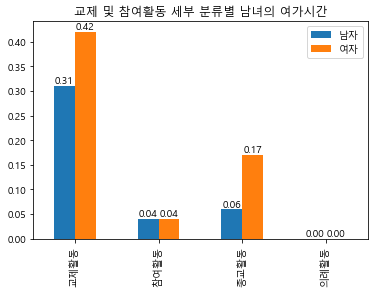

In [5]:
leisure_2019_gender = leisure_2019.loc['교제 및 참여활동', ['요일평균', '요일평균.1', '요일평균.2']]
leisure_2019_gender = leisure_2019_gender.astype('float')
leisure_2019_gender.index=['소계', '교제활동', '참여활동', '종교활동', '의례활동']
leisure_2019_gender.columns = ['전체', '남자', '여자']

plt.rcParams['font.family']='Malgun Gothic'
graph = leisure_2019_gender.loc['교제활동':, '남자':].plot(kind='bar', title='교제 및 참여활동 세부 분류별 남녀의 여가시간')
for p in graph.patches:  
    left, bottom, width, height = p.get_bbox().bounds
    graph.annotate("%.2f"%(height), xy=(left+width/2, height+0.01), ha='center', va='center')

## 왜 남성에게서 '문화 및 여가활동' 시간이 더 높을까?
뭔가 큰 카테고리로만 보았을 때에는 여성이 더 '문화'생활을 많이 하지 않을까 생각했는데 결과가 다르게 나와서 세부항목 볼 필요성 느낌.

분석 결과)
* '문화 및 여가활동'이라고 했을 때에 '전시, 영화' 같은 문화생활들을 위주로 떠올려서 여성이 남성보다 이에 할애하는 여가시간이 더 많을 것이라고 추측한 것이었으나 실제 데이터 상에서는 이 안에 '미디어를 이용한 여가활동', '스포츠', '게임' 등이 포함되어있었음. 이 각각의 남성, 여성의 여가시간을 비교한 결과 '게임 및 놀이', '스포츠 및 레포츠' 영역에서 남자가 여자보다 높은 여가시간 수치를 보이고 있어서 이것이 전체 '문화 및 여가활동' 영역의 여가시간 결과에 영향을 준 것이었음을 확인할 수 있었다.
* 주변 친구들을 보더라도, '스포츠' 및 '게임' 을 하며 여가시간을 보내는 친구들의 성비를 보면 남자들이 많기에, 이 결과는 나 개인의 기존 인식과도 일치하는 결과임을 확인하였다.


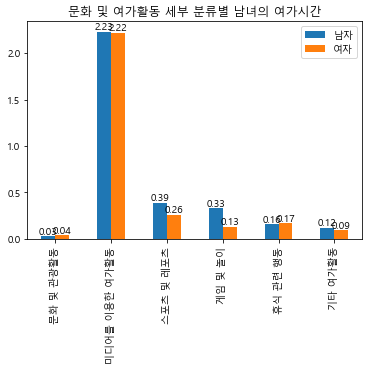

In [13]:
leisure_2019_gender = leisure_2019.loc['문화 및 여가활동', ['요일평균', '요일평균.1', '요일평균.2']]
leisure_2019_gender = leisure_2019_gender.astype('float')
leisure_2019_gender.index=['소계', '문화 및 관광활동', '미디어를 이용한 여가활동', '스포츠 및 레포츠', '게임 및 놀이', '휴식 관련 행동', '기타 여가활동']
leisure_2019_gender.columns = ['전체', '남자', '여자']

plt.rcParams['font.family']='Malgun Gothic'
graph = leisure_2019_gender.loc['문화 및 관광활동':, '남자':].plot(kind='bar', title='문화 및 여가활동 세부 분류별 남녀의 여가시간')
for p in graph.patches:  
    left, bottom, width, height = p.get_bbox().bounds
    graph.annotate("%.2f"%(height), xy=(left+width/2, height+0.05), ha='center', va='center')

모든 그래프 상에서 사실 정확하지 못했던 부분은 시간을 표시하는 방식이었음. 원래의 데이터 상에서 시간을 :으로 구분하여 시간:분 형태로 표현한 것을 float 형태로 변환하기 위해서는 이를 숫자 형태로 바꿀 필요가 있었고 하지만 정확하게 시간을 소숫점 형태로 변환하는 공식을 넣지는 않고, :를 .로 변형한 형태로만 표현하였다. 즉, 2:40이면 2시간 40분을 의미하고 엄밀하게 이를 시간단위 기준으로 소숫점으로 변형하면 2.66 시간이 되어야 맞으나 나는 이를 2.40으로 표현하여 그래프 상에 표현한 점이 큰 오류이다...